## 0. 课程大纲

### 0.1 结构元
```python
cv.getStructuringElement(cv.MORPH_RECT, (3,3))
MORPH_RECT MORPH_CROSS MORPH_ELLIPSE
```

### 0.2 膨胀和腐蚀
```python
cv.erode(img, kernel, [iterations=1])
cv.dilate(img, kernel, [iterations=1])
cv.morphologyEx(img, cv.MORPH_ERODE, kernel)
cv.morphologyEx(img, cv.MORPH_DILATE, kernel)
```

### 0.3 开运算、闭运算、形态学梯度
```python
cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
```

### 0.4 顶帽变换、底帽变换
```python
cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
```

### 0.5 击中击不中变换
```python
cv.morphologyEx(img, cv.MORPH_HITMISS, kernel) # 无用
```

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 7. 形态学处理

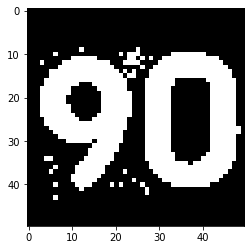

In [5]:
img_bin = cv.imread("pic/ninety_bin50x50.png", -1)
show(img_bin)

### 7.1 腐蚀、膨胀

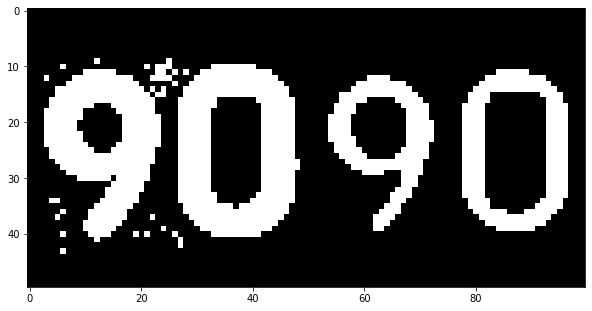

In [339]:
kernel = np.ones((3,3), dtype=np.int)
img_erode = cv.erode(img_bin, kernel)
img_dilate = cv.dilate(img_bin, kernel) # iterations

show(np.hstack([img_bin, img_erode, img_dilate]))

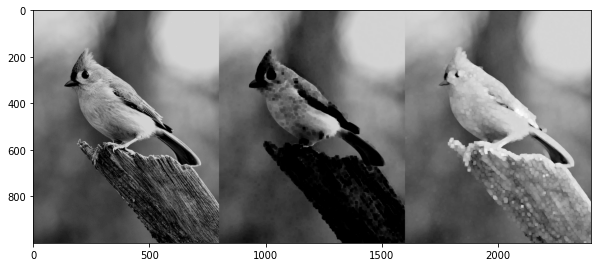

In [409]:
I = cv.imread('pic/bird1000x800.jpg', 0)
K = np.ones((11,11), dtype=np.int)

img_e = cv.erode(I, K)
img_d = cv.dilate(I, K)

show(np.hstack([I, img_e, img_d]))

In [412]:
cv.imwrite('pic/bird_erode_dilate_gray.png', np.hstack([I, img_e, img_d]))

True

### 7.3 结构元的设计

In [14]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
print(kernel)

kernel = cv.getStructuringElement(cv.MORPH_CROSS, (5,5))
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


### 7.4 开运算、闭运算

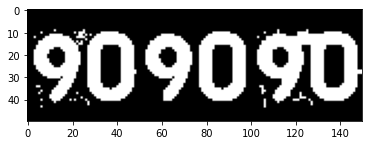

In [6]:
img_bin = cv.imread("pic/ninety_bin50x50.png", -1)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
img_open = cv.morphologyEx(img_bin, cv.MORPH_OPEN, kernel)
img_close = cv.morphologyEx(img_bin, cv.MORPH_CLOSE, kernel) 

show(np.hstack([img_bin, img_open, img_close]))

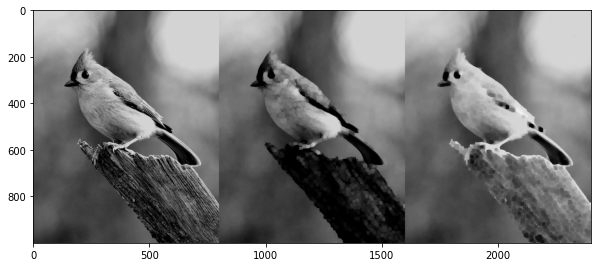

In [411]:
img = cv.imread("pic/bird1000x800.jpg", 0)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (11,11))
img_open = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
img_close = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel) 

show(np.hstack([img, img_open, img_close]))

In [414]:
cv.imwrite('pic/bird_open_close_gray.png', np.hstack([img, img_open, img_close]))

True

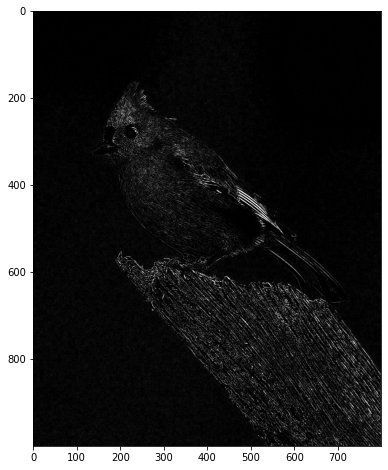

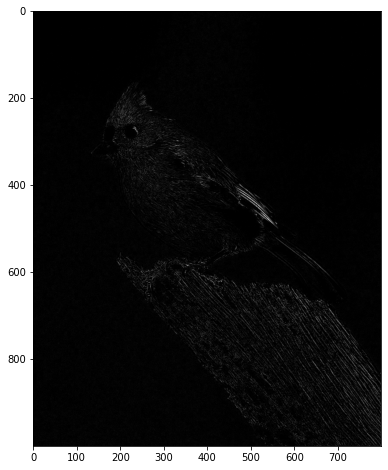

In [397]:
show(cv.subtract(img, img_open))
show(cv.subtract(img_close, img))

In [395]:
cv.subtract(img, img_open).max()

243

In [343]:
cv.imwrite('pic/bulk_bin120x100.png', img_bin)

True

### 7.6 形态学梯度

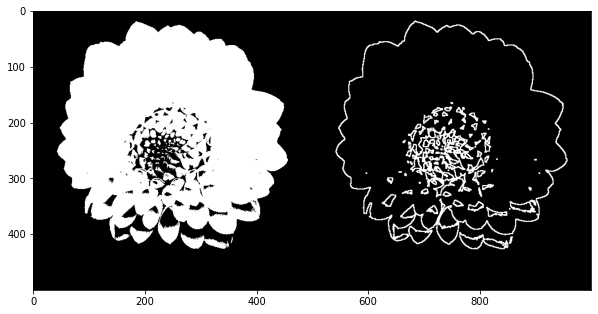

In [369]:
img = cv.imread('pic/flower_bin500x500.png', -1)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3)) 
img_grad = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel) 

show(np.hstack([img, img_grad]))

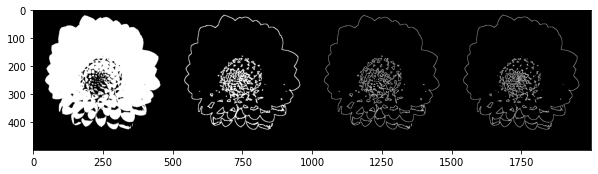

In [373]:
edge1 = cv.subtract(img, cv.erode(img, kernel))
edge2 = cv.subtract(cv.dilate(img, kernel), img)

show(np.hstack([img, img_grad, edge1, edge2]))

In [374]:
cv.imwrite('pic/flower_morph_edge.png', np.hstack([img, img_grad, edge1, edge2]))

True

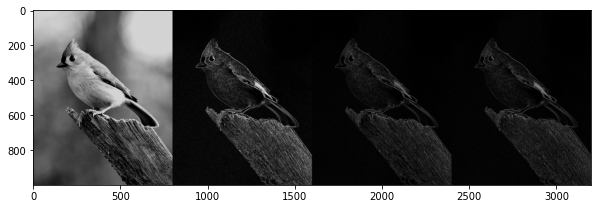

In [416]:
img = cv.imread('pic/bird1000x800.jpg', 0)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3)) 
img_grad = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel) 

show(np.hstack([img, img_grad, edge1, edge2]))

In [417]:
cv.imwrite('pic/bird_morph_gradient.png', np.hstack([img, img_grad]))

True

### 7.7 顶帽变换

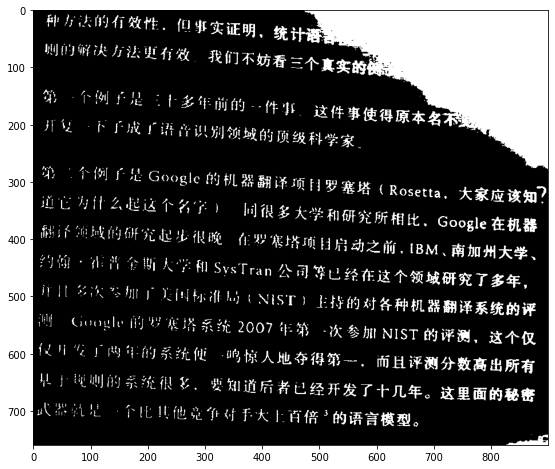

In [445]:
_, img_bin = cv.threshold(I, 160, 255, 0)
show(img_bin)

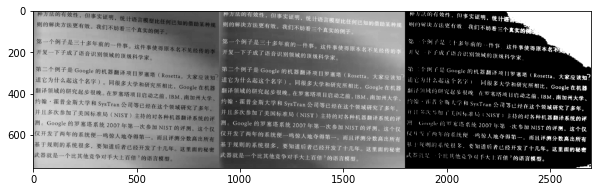

In [459]:
I0 = cv.imread('pic/page760x900.jpg', 0)
I = cv.imread('pic/page_inv760x900.jpg', 0)

K = cv.getStructuringElement(cv.MORPH_ELLIPSE, (21,21)) 
I_tophat = cv.morphologyEx(I, cv.MORPH_TOPHAT, K) 

show(np.hstack([I0, I, img_bin]))

In [460]:
cv.imwrite('pic/page_inv_bin.jpg', np.hstack([I0, I, img_bin]))

True

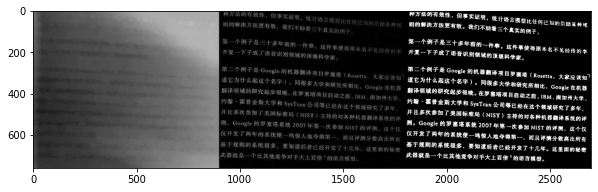

In [471]:
I_open = cv.morphologyEx(I, cv.MORPH_OPEN, K)
I_top = cv.subtract(I, I_open)

_, img_bin2 = cv.threshold(I_top, 30, 255, 0)

show(np.hstack([I_open, I_top, img_bin2]))

In [461]:
cv.imwrite('pic/page_top_bin.jpg', np.hstack([I_open, I_top, img_bin2]))

True

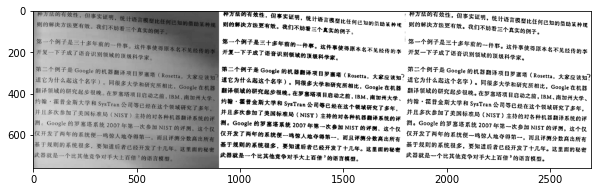

In [472]:
img_adap_bin = cv.adaptiveThreshold(I0, 255, 0, 0, 21, 8)

show(np.hstack([I0, 255-img_bin2, img_adap_bin]))

In [473]:
cv.imwrite('pic/page_topbin_adabin.jpg', np.hstack([I0, 255-img_bin2, img_adap_bin]))

True

### 7.8 底帽变换

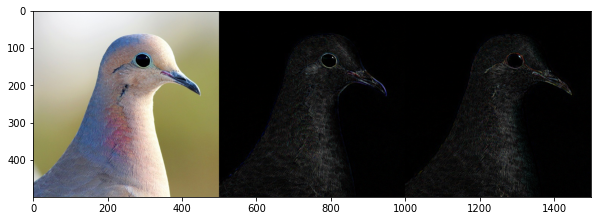

In [429]:
img = cv.imread('pic/foolbird500x500.jpg')
# img_bin = binary(img, True)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7)) 
img_tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel) 
img_blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel) 

show(np.hstack([img, img_tophat, img_blackhat]))

In [430]:
cv.imwrite('pic/foolbird_top_black.jpg', np.hstack([img, img_tophat, img_blackhat]))

True

## 7.9 击中击不中变换

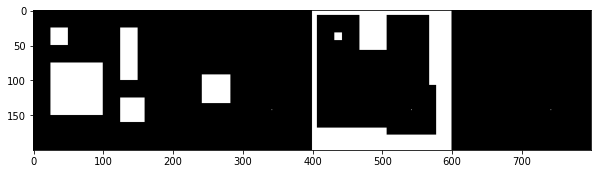

In [247]:
img = cv.imread('pic/retangle_find35.png', -1)
K = cv.imread('pic/retangle35x35.png', -1)

hm1 = cv.morphologyEx(img, cv.MORPH_HITMISS, K) 
hm2 = cv.morphologyEx(255-img, cv.MORPH_HITMISS, 1-K)

hm = cv.bitwise_and(hm1, hm2)

show(np.hstack([img, hm1, hm2, hm]))

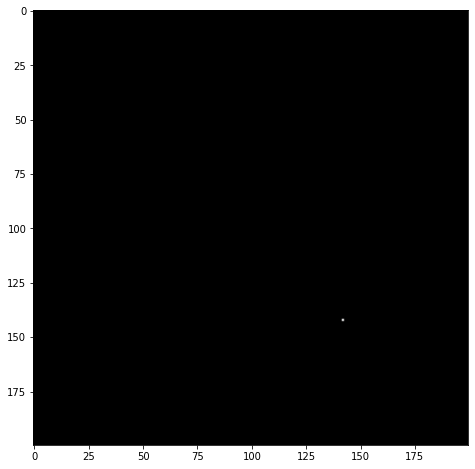

In [259]:
## 实现
I = cv.imread('pic/rectangle_find35.png', -1)
K = cv.imread('pic/rectangle35x35.png', -1)

Ic = 255 - I
Kc = 1 - K

IKErode = cv.erode(I, K)
IcKcErode = cv.erode(Ic, Kc)

hitmiss = cv.bitwise_and(IKErode, IcKcErode)
show(hitmiss)

In [265]:
cv.imwrite('pic/rectangle_histmiss.png', np.hstack([I, IKErode, Ic, IcKcErode, hitmiss]))

True

In [327]:
x = np.random.choice([0, 255],(5,5)).astype(np.uint8)
k = cv.getStructuringElement(cv.MORPH_RECT, (2,2))
print(x)
print(k)

[[255 255 255   0 255]
 [255   0   0   0   0]
 [  0   0   0 255 255]
 [255 255 255 255 255]
 [  0 255   0 255 255]]
[[1 1]
 [1 1]]


In [328]:
print(cv.erode(x, k, borderType=cv.BORDER_CONSTANT, borderValue=0))

[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0 255]
 [  0   0   0   0 255]]


In [329]:
print(cv.dilate(x, k, borderType=cv.BORDER_CONSTANT, borderValue=255))

[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255   0 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


In [333]:
print(cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5)))

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


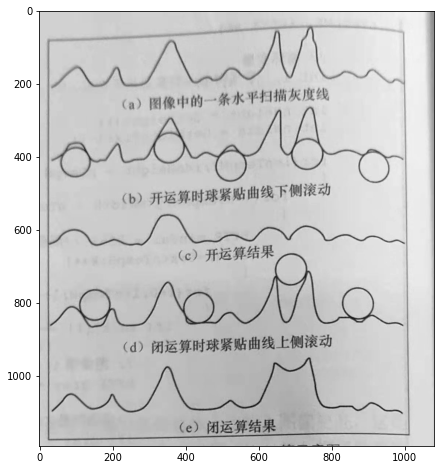

In [418]:
img = cv.imread('E:/FirePower/soureces/pictures/close_open_operation.jpg', 0)
show(img)

In [421]:
img.shape

(1191, 1080)

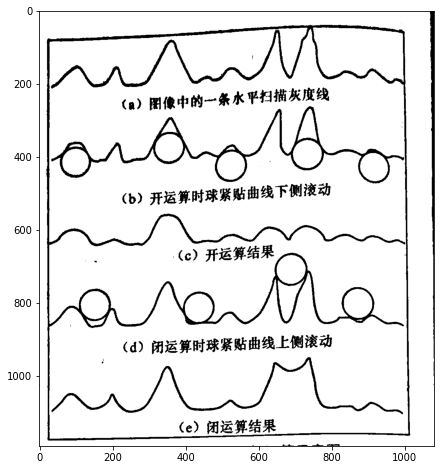

In [427]:
img_bin = cv.adaptiveThreshold(img, 255, 0, 0, 51, 15)
show(img_bin)

In [428]:
cv.imwrite('E:/FirePower/soureces/pictures/close_open_operation_bin.png', img_bin)

True